In [1]:
%cd ../..

c:\Users\tacke\OneDrive\Documents\GitHub\Modern-Time-Series-Forecasting-with-Python-2E-1


In [2]:
import numpy as np
import os
np.random.seed(42)
import plotly.express as px
import plotly.graph_objs as go
import torch
import matplotlib.pyplot as plt

In [3]:
os.makedirs("imgs/chapter_11", exist_ok=True)

# Helper Functions

In [4]:
def sample_grid(M=500, x_max=2.0):
    ii, jj = torch.meshgrid(torch.linspace(-x_max, x_max, M,),
                          torch.linspace(-x_max, x_max, M))
    X_all = torch.cat([ii.unsqueeze(-1),
                     jj.unsqueeze(-1)],
                     dim=-1).view(-1, 2)
    return X_all

# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

In [8]:
# def plot_grid(activation, activation_name, xygrid, colors, figsize=(15,5)):
#     plt.rcParams.update({'font.size': 16})
#     titles = ["Original Vector Space", "Activated Vector Space"]
#     xygrids = [xygrid, activation(xygrid)]
#     c = len(xygrids)
#     fig, axes = plt.subplots(1, c+1, figsize=figsize, facecolor="w")
#     x = torch.linspace(-10, 10, 50)
#     y = activation(x)
#     axes[0].set_xlabel('Input')
#     axes[0].set_ylabel('Output')
#     axes[0].set_title(f'{activation_name} Activation Function')
#     axes[0].plot(x, y)
#     axes[0].axvline(x=0, c="grey")
#     axes[0].axhline(y=0, c="grey")
#     # Plot grid points 
#     # plt.figure()
#     for ax, xygrid, title in zip(axes[1:], xygrids, titles):
#         ax.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
#         # Set axis limits
#         ax.grid(True)
#         # ax1.axis("equal")
#         ax.set_title(title)
#         ax.set_aspect('equal')
#     axes[1].get_shared_x_axes().join(axes[1], axes[2])
#     axes[1].get_shared_y_axes().join(axes[1], axes[2])
#     plt.tight_layout()
#     return fig

import matplotlib.pyplot as plt
import torch

def plot_grid(activation, activation_name, xygrid, colors, figsize=(15,5)):
    plt.rcParams.update({'font.size': 16})
    titles = ["Original Vector Space", "Activated Vector Space"]
    xygrids = [xygrid, activation(xygrid)]
    c = len(xygrids)
    
    fig, axes = plt.subplots(1, c+1, figsize=figsize, facecolor="w", sharex=True, sharey=True)
    
    x = torch.linspace(-10, 10, 50)
    y = activation(x)
    
    axes[0].set_xlabel('Input')
    axes[0].set_ylabel('Output')
    axes[0].set_title(f'{activation_name} Activation Function')
    axes[0].plot(x, y)
    axes[0].axvline(x=0, c="grey")
    axes[0].axhline(y=0, c="grey")
    
    for ax, xygrid, title in zip(axes[1:], xygrids, titles):
        ax.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
        ax.grid(True)
        ax.set_title(title)
        ax.set_aspect('equal')
    
    plt.tight_layout()
    return fig


# Activation functions

In [9]:
xygrid = sample_grid(M =20, x_max=2)
# Map grid coordinates to colors
colors = list(map(colorizer, xygrid[:,0], xygrid[:,1]))

## Sigmoid

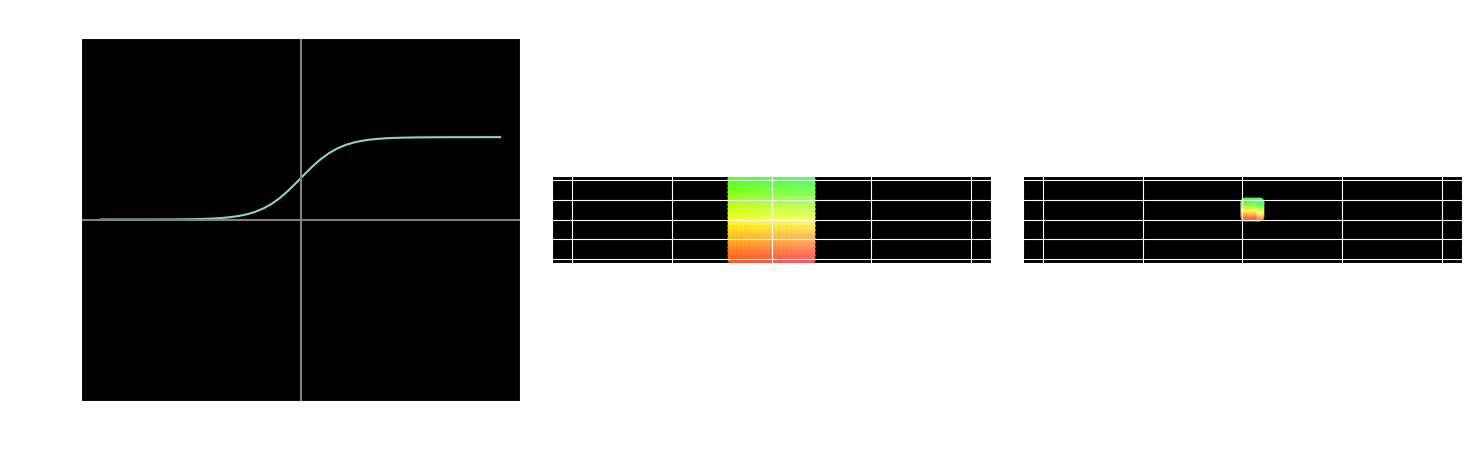

In [10]:
fig = plot_grid(torch.nn.functional.sigmoid, "Sigmoid", xygrid, colors)
plt.savefig("imgs/chapter_11/sigmoid.png")

## TanH

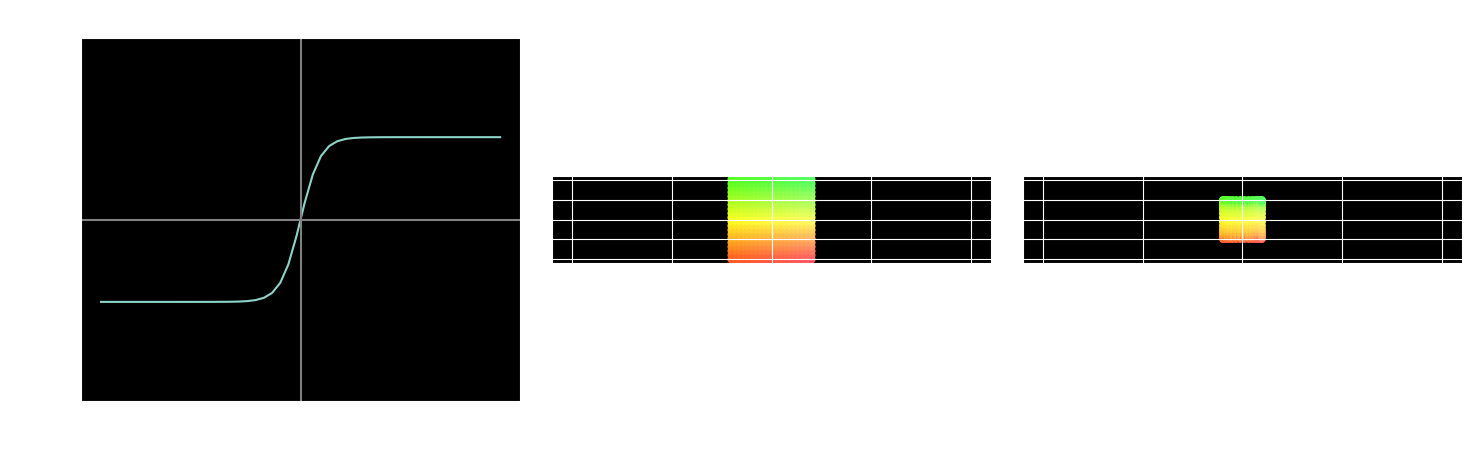

In [11]:
fig = plot_grid(torch.nn.functional.tanh, "TanH", xygrid, colors)
plt.savefig("imgs/chapter_11/tanh.png")

## ReLU

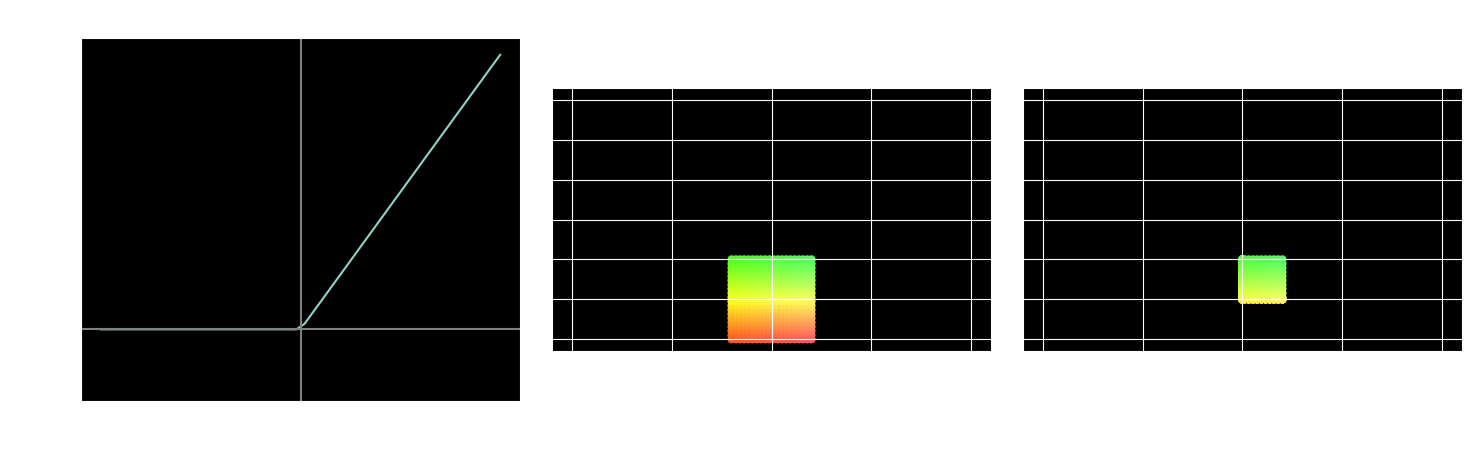

In [12]:
fig = plot_grid(torch.nn.functional.relu, "ReLU", xygrid, colors)
plt.savefig("imgs/chapter_11/relu.png")

## Leaky ReLU

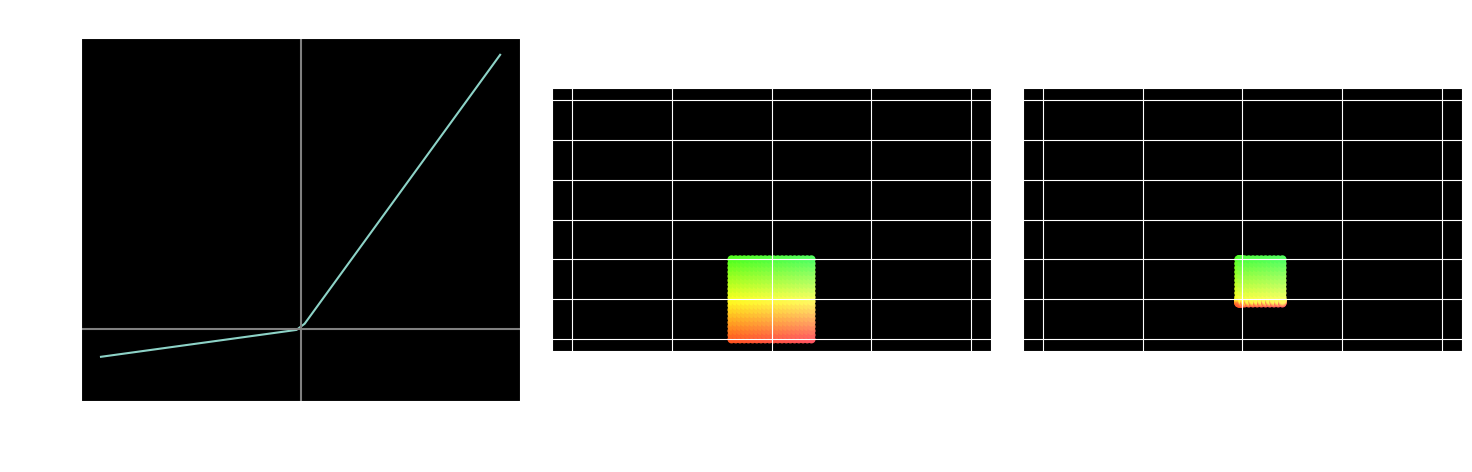

In [13]:
from functools import partial
act_fn = partial(torch.nn.functional.leaky_relu, negative_slope=0.1)
fig = plot_grid(act_fn, "Leaky ReLU", xygrid, colors)
plt.savefig("imgs/chapter_11/leaky_relu.png")

## SoftPlus

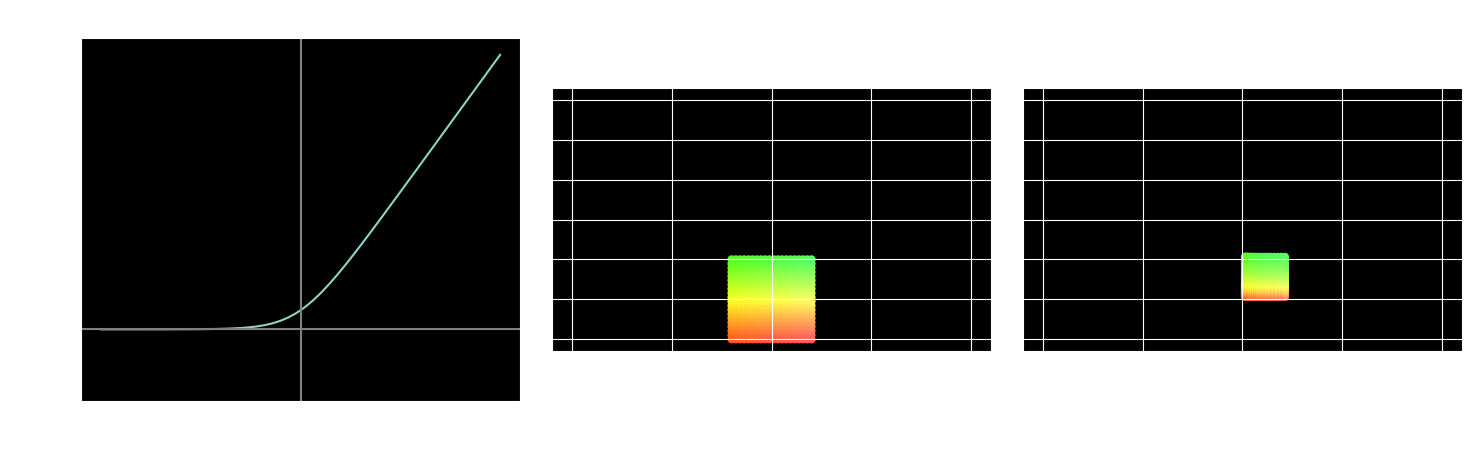

In [14]:
fig = plot_grid(torch.nn.functional.softplus, "SoftPlus", xygrid, colors)
plt.savefig("imgs/chapter_11/softplus.png")

## GELU

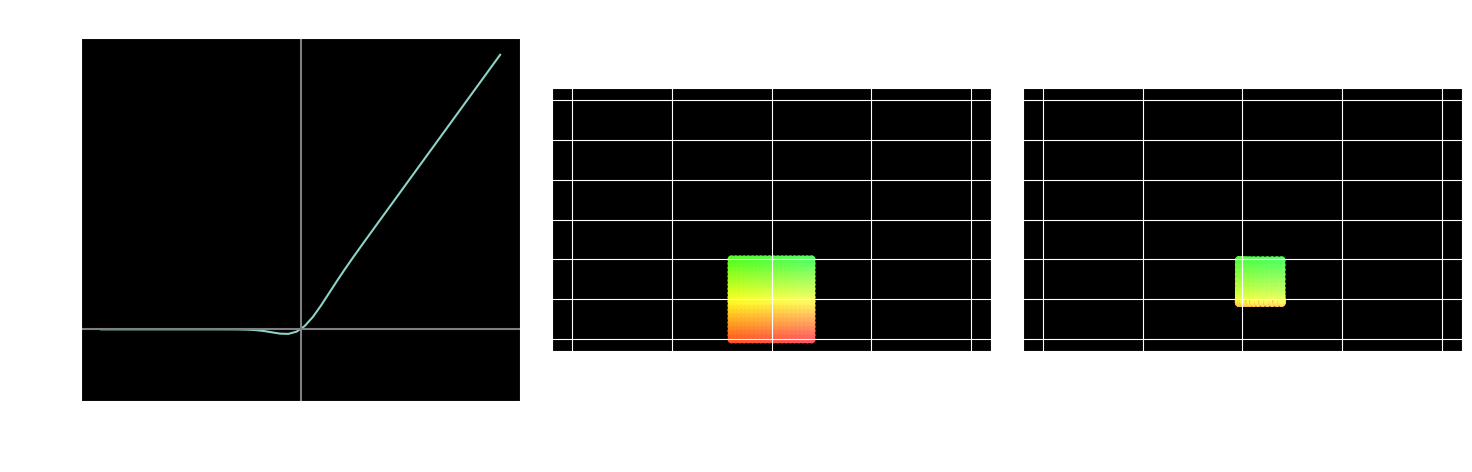

In [15]:
fig = plot_grid(torch.nn.functional.gelu, "GELU", xygrid, colors)
plt.savefig("imgs/chapter_11/gelu.png")

# Output Activations

## Softmax

In [16]:
x = torch.rand((3,))*10
y = torch.nn.functional.softmax(x, dim=-1)
x = x.numpy()
x, y

(array([8.590918, 8.453775, 9.940122], dtype=float32),
 tensor([0.1746, 0.1523, 0.6731]))

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Raw Output", "Softmax Output"))

fig.add_trace(
    go.Bar(x=np.arange(3), y=x, text=x, texttemplate = "%{y:.3f}", marker_color='indianred'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=np.arange(3), y=y, text=y, texttemplate = "%{y:.3f}", marker_color='lightsalmon'),
    row=1, col=2
)

fig.update_layout(height=400, width=800, showlegend=False)
fig.write_image("imgs/chapter_11/softmax.png")
fig.show()